 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
#set file path

whale_data = Path("Resources/whale_returns.csv")

# Reading whale returns, set date as index, infer datetime so that we can use it to search / sort, sort in ascending order

whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_df.head()


C:\Users\tdanner.TZACONSULTING\AppData\Local\Temp\ipykernel_9200\1894758458.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
#set file path

algo_data = Path("Resources/algo_returns.csv")

# Reading algorithmic returns

algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\tdanner.TZACONSULTING\AppData\Local\Temp\ipykernel_9200\4050513239.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
#set file path

sp500_data = Path("Resources/sp500_history.csv")

# Reading S&P 500 Closing Prices

sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\tdanner.TZACONSULTING\AppData\Local\Temp\ipykernel_9200\4221028886.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
C:\Users\tdanner.TZACONSULTING\AppData\Local\Temp\ipykernel_9200\4221028886.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
#remove $ from string
sp500_df['Close'] = sp500_df['Close'].str.replace("$", "")
sp500_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [11]:
#change Close from objects to float
#used the following source: https://stackoverflow.com/questions/48094854/pandas-convert-data-type-from-object-to-float
sp500_df['Close'] = sp500_df.Close.astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Count nulls
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [14]:
#remove nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {'Close' : 'S&P 500'}, inplace = True)
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis = 'columns', join = 'inner')
#sort indexes in ascending order
combined_returns_df.sort_index(inplace=True)
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

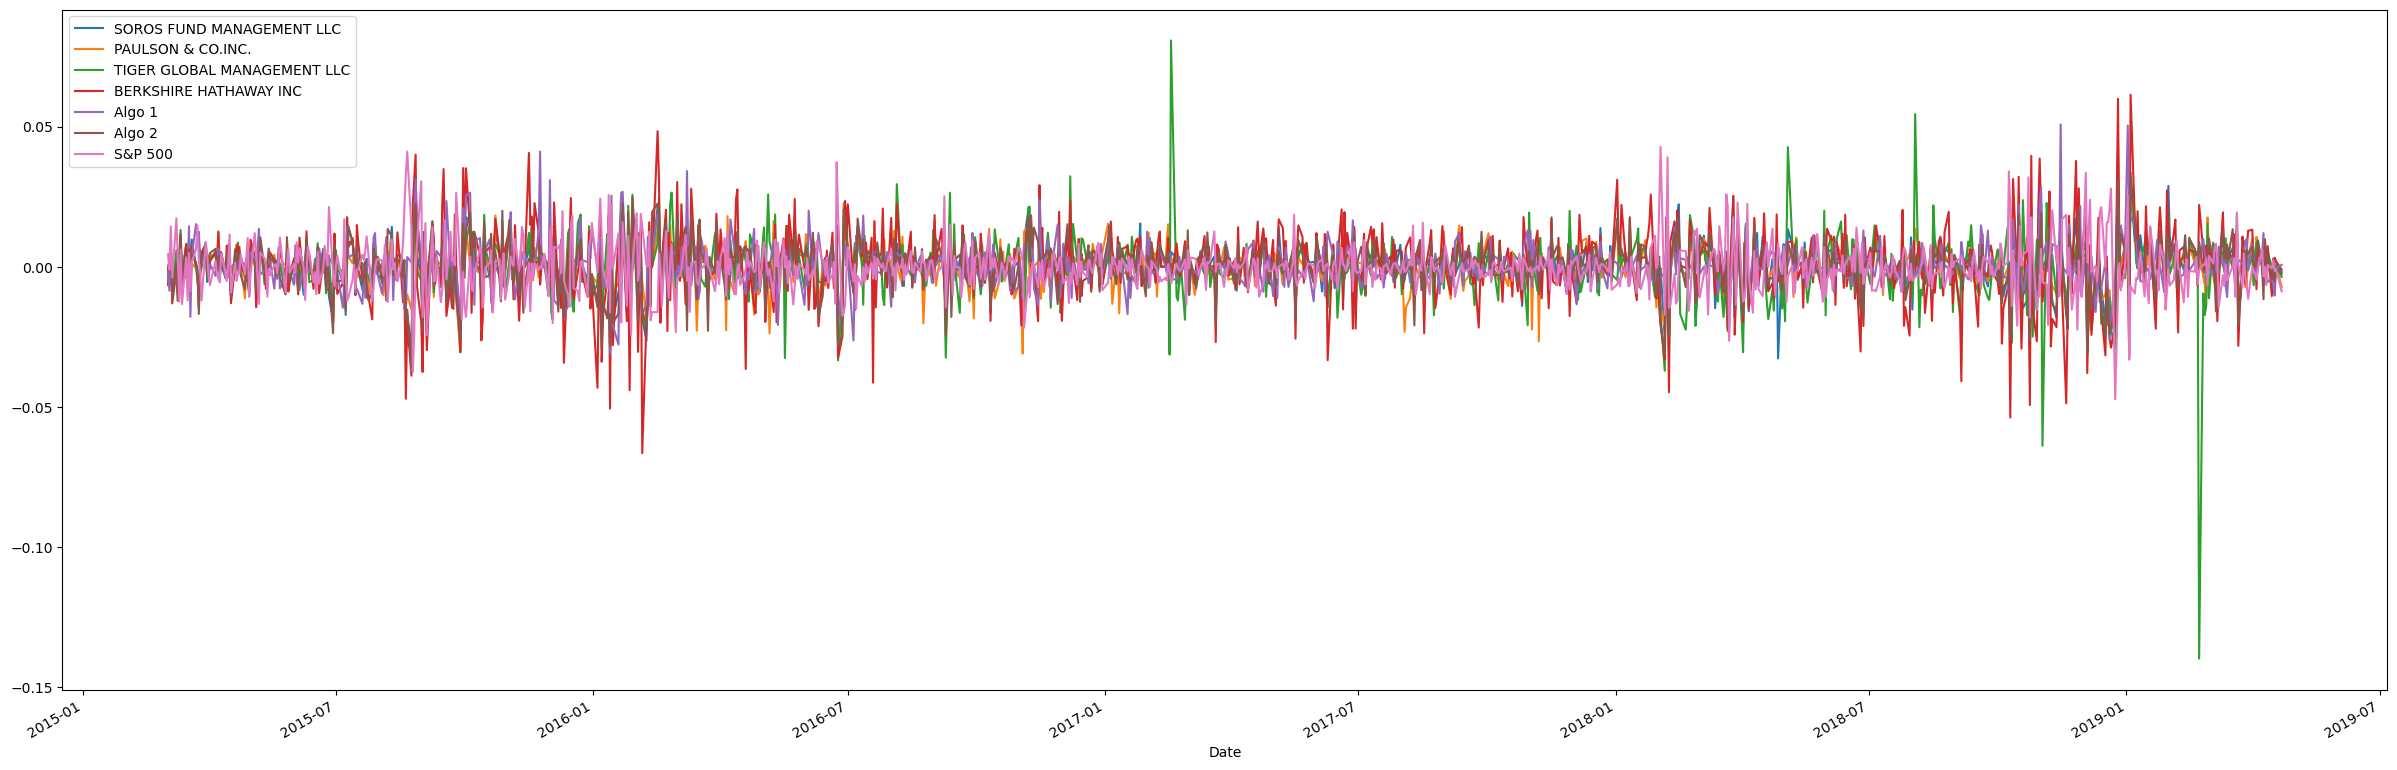

In [17]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize=(30,10));

#### Calculate and Plot cumulative returns.

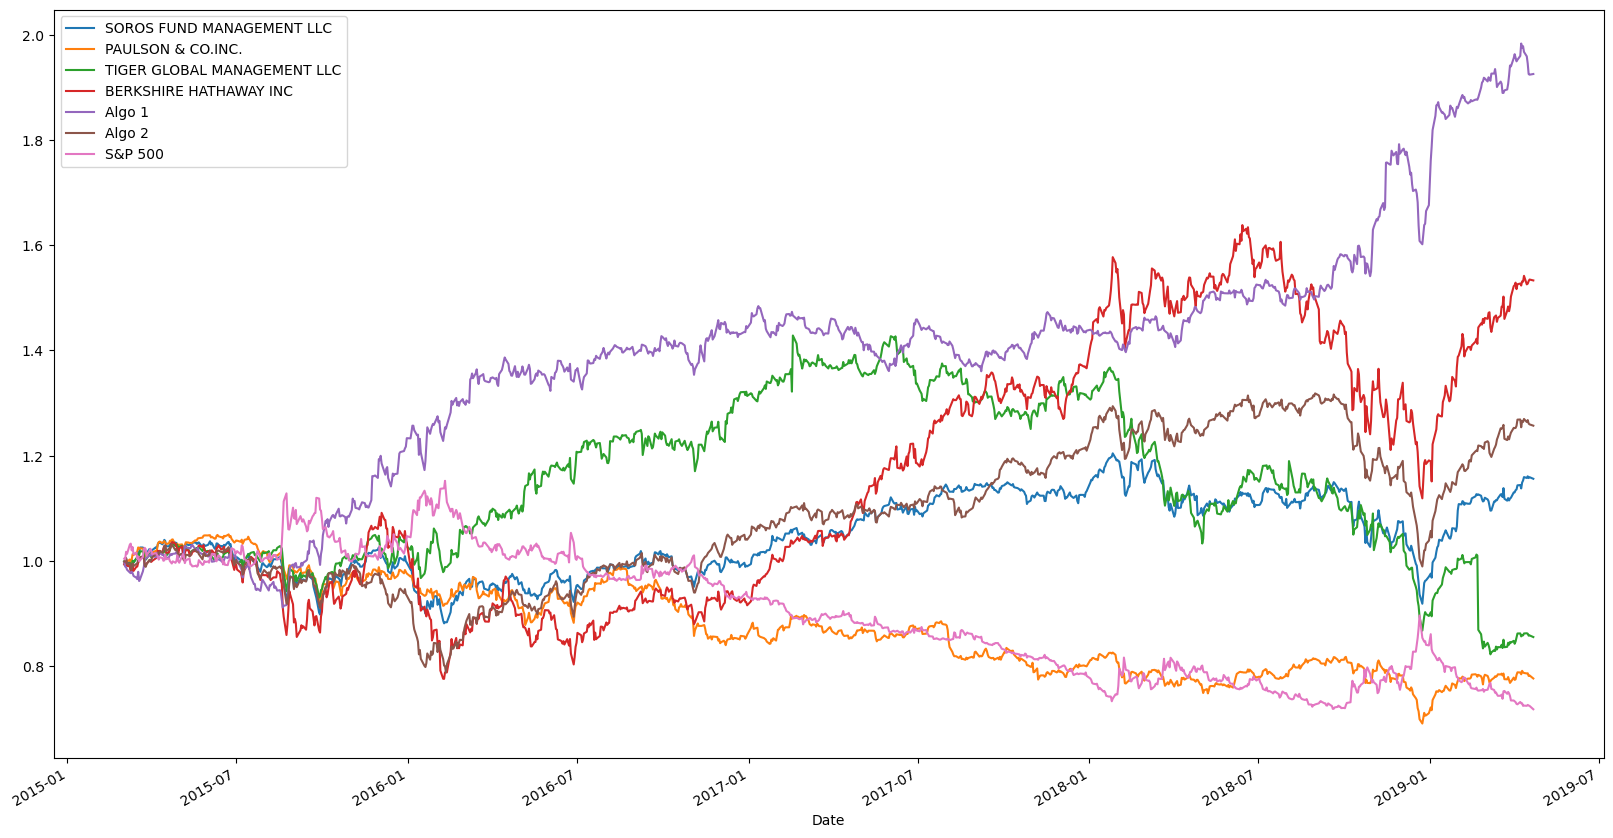

In [18]:
# Calculate cumulative returns of all portfolios
cum_portfolio_returns = (1 + combined_returns_df).cumprod()
# Plot cumulative returns
cum_portfolio_returns.plot(figsize=(20, 11));

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


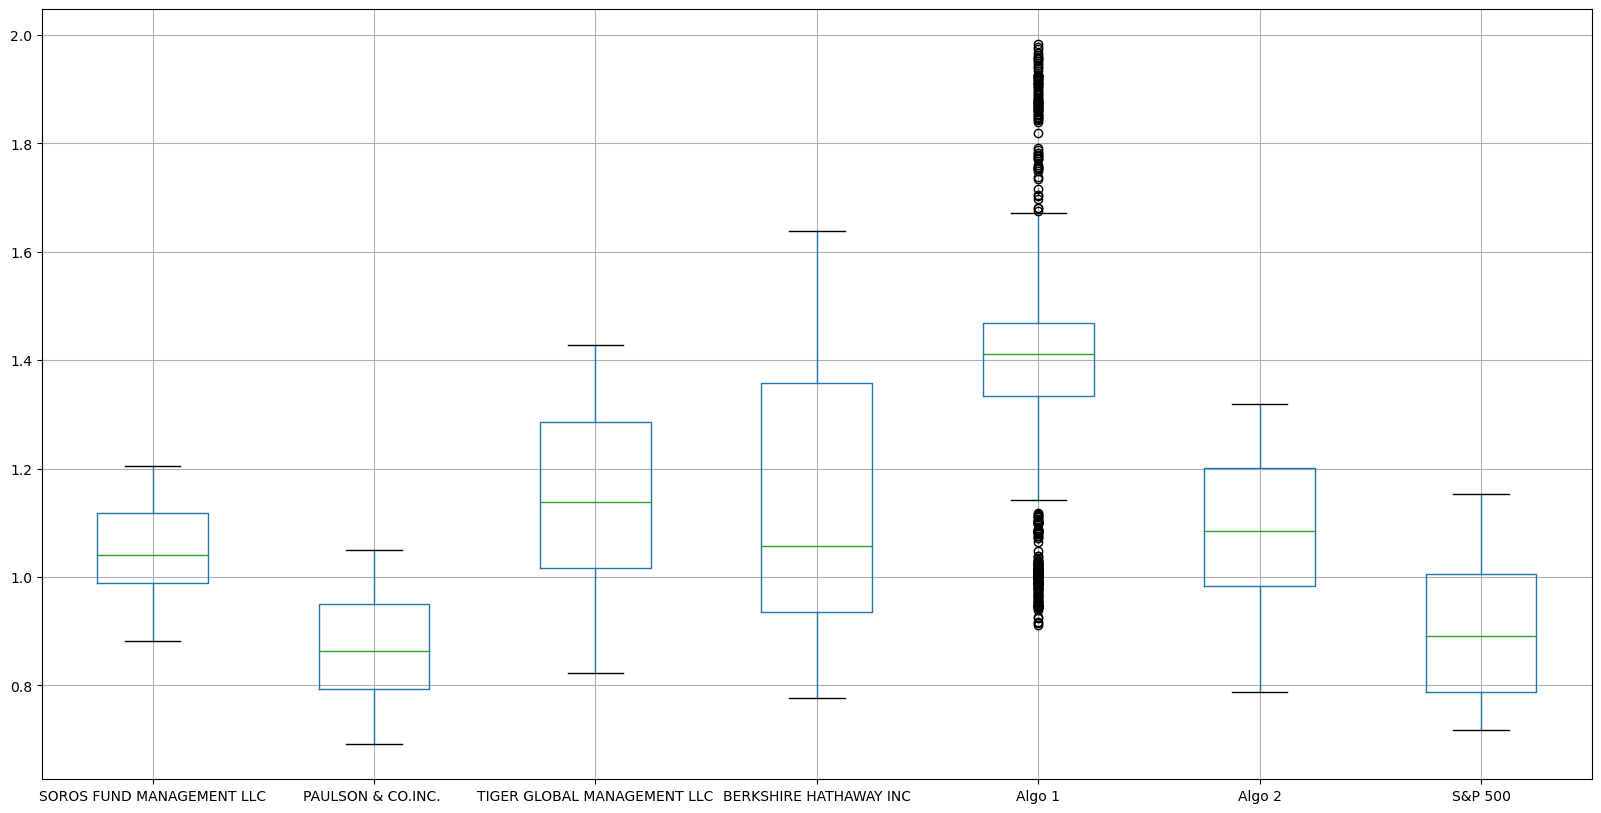

In [19]:
# Box plot to visually show risk
cum_portfolio_returns.boxplot(figsize=(20,10));

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
combined_returns_std = combined_returns_df.std()
combined_returns_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns_std * np.sqrt(252)
annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

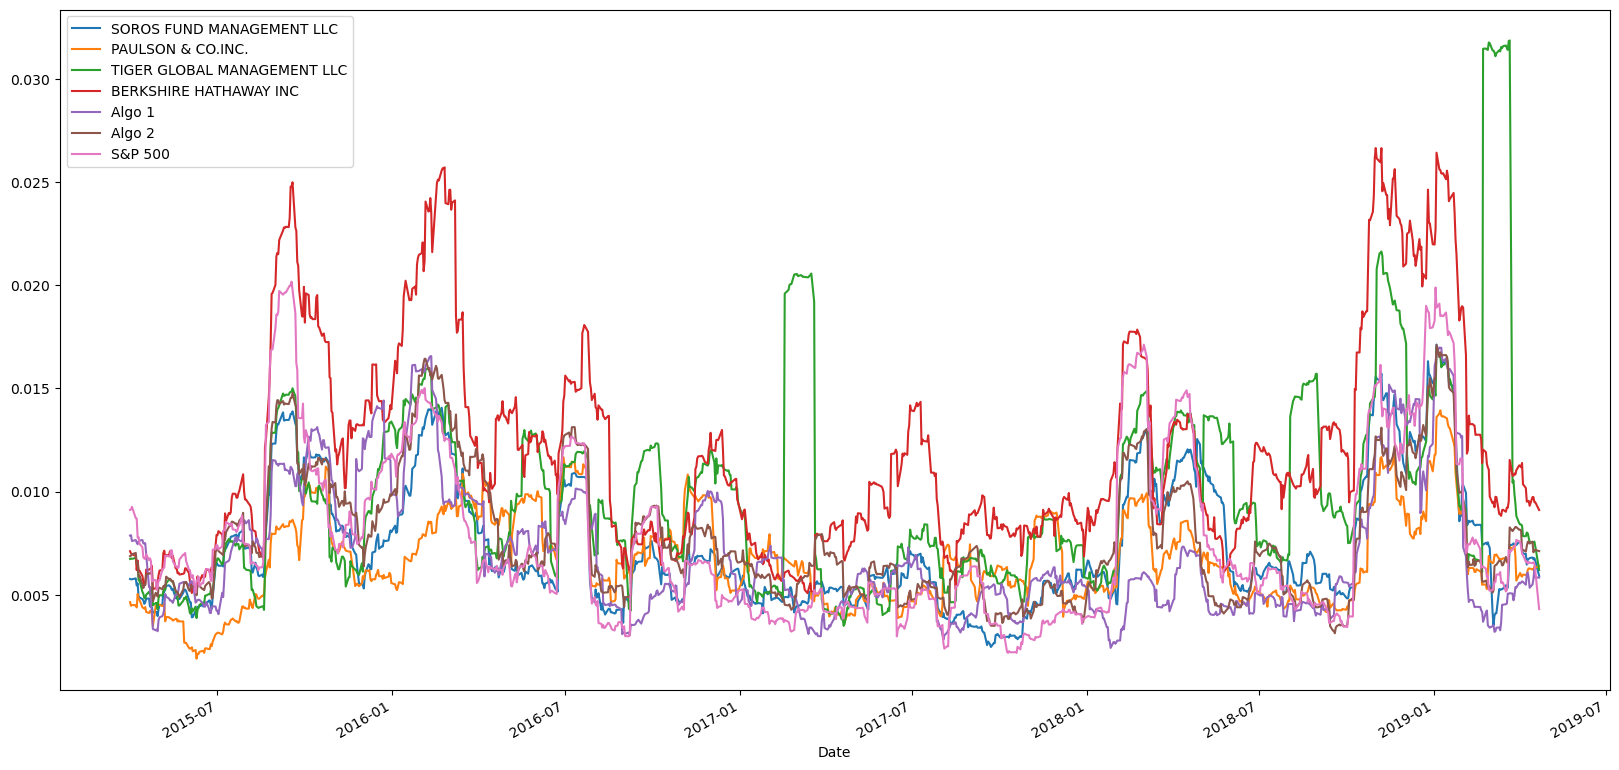

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = combined_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(20,10));

### Calculate and plot the correlation

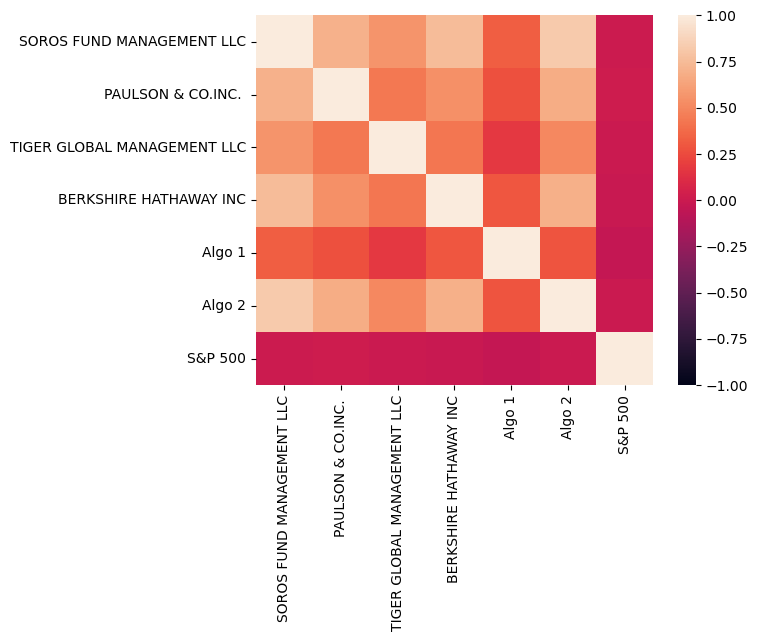

In [24]:
#import seaborn to create heatmap
import seaborn as sns
# Calculate the correlation
correlation = combined_returns_df.corr()
correlation
#show heatmap
sns.heatmap(correlation, vmin=-1, vmax=1);


In [25]:
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [26]:
# Calculate covariance of a single portfolio
algo_1_covariance = combined_returns_df['Algo 1'].cov(combined_returns_df['S&P 500'])
algo_1_covariance

-2.2230425517155125e-06

In [27]:
# Calculate variance of S&P 500
variance_sp500 = combined_returns_df['S&P 500'].var()
variance_sp500

7.373467552840441e-05

In [28]:
# Computing beta
algo_1_beta = algo_1_covariance / variance_sp500
algo_1_beta

-0.03014921454233757

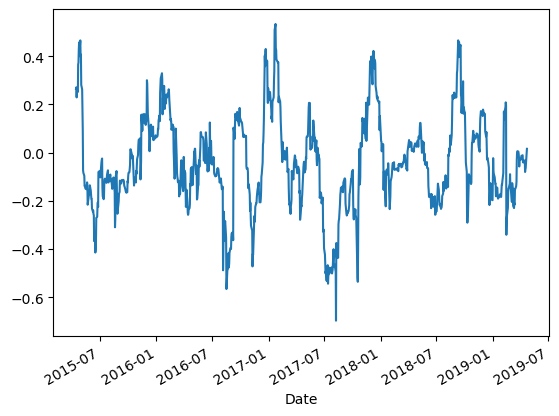

In [29]:
#calc rolling covariance and sp500 rolling variance
rolling_algo_1_covariance = combined_returns_df['Algo 1'].rolling(window=30).cov(combined_returns_df['S&P 500'])

rolling_sp500_variance = combined_returns_df['S&P 500'].rolling(window=30).var()

rolling_algo_1_beta = rolling_algo_1_covariance/rolling_sp500_variance

# Plot beta trend (30 day rolling)
rolling_algo_1_beta.plot();

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [30]:
# Use `ewm` to calculate the rolling window
combined_returns_std.ewm(halflife=21)


ExponentialMovingWindow [halflife=21,min_periods=1,adjust=True,ignore_na=False,axis=0,method=single]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_std * np.sqrt(252))
sharpe_ratios.head(7)

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

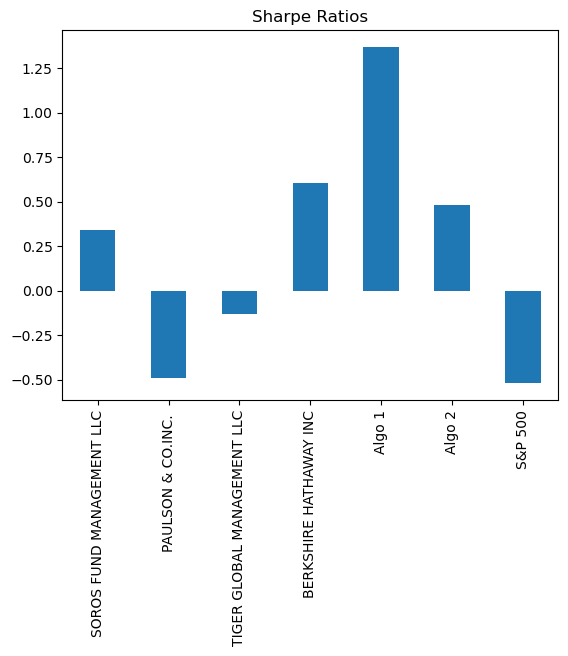

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios');

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The algo investments have higher sharpe rations meaning they are safer investments, furthermore they are negitively correlated to the S&P 500 meaning they do not move together. This could be a good investment when you do not expect the S&P 500 to have a good year. Furthermore they are not hugely negatively correlate meaning they can be used to diversify if you are also invest in an S&P500 index fund.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:
# Reading data from 1st stock
tsla_data = Path("Resources/TSLA.csv")

tsla_df = pd.read_csv(tsla_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

tsla_df.head()

C:\Users\tdanner.TZACONSULTING\AppData\Local\Temp\ipykernel_9200\3307308192.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  tsla_df = pd.read_csv(tsla_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2015-03-02 16:00:00,13.16
2015-03-03 16:00:00,13.30
2015-03-04 16:00:00,13.50
2015-03-05 16:00:00,13.38
2015-03-06 16:00:00,12.93


In [34]:
# Reading data from 2nd stock
xom_data = Path("Resources/XOM.csv")

xom_df = pd.read_csv(xom_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

xom_df.head()

C:\Users\tdanner.TZACONSULTING\AppData\Local\Temp\ipykernel_9200\443863773.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  xom_df = pd.read_csv(xom_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2015-03-02 16:00:00,88.04
2015-03-03 16:00:00,87.62
2015-03-04 16:00:00,87.18
2015-03-05 16:00:00,86.74
2015-03-06 16:00:00,85.63


In [35]:
# Reading data from 3rd stock
gld_data = Path("Resources/GLD.csv")

gld_df = pd.read_csv(gld_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

gld_df.head()

C:\Users\tdanner.TZACONSULTING\AppData\Local\Temp\ipykernel_9200\3670348489.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  gld_df = pd.read_csv(gld_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2015-03-02 16:00:00,115.68
2015-03-03 16:00:00,115.47
2015-03-04 16:00:00,115.11
2015-03-05 16:00:00,115.00
2015-03-06 16:00:00,111.86


In [36]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([tsla_df, xom_df, gld_df], axis = 'columns', join = 'inner')
#sort indexes in ascending order and rename columns
my_portfolio.sort_index(inplace=True)
# Reorganize portfolio data by having a column per symbol
my_portfolio.columns = ['TSLA', 'XOM', 'GLD']
my_portfolio.head()

,TSLA,XOM,GLD
Date,,,
2015-03-02 16:00:00,13.16,88.04,115.68
2015-03-03 16:00:00,13.30,87.62,115.47
2015-03-04 16:00:00,13.50,87.18,115.11
2015-03-05 16:00:00,13.38,86.74,115.00
2015-03-06 16:00:00,12.93,85.63,111.86


In [37]:
# Calculate daily returns
my_portfolio_returns = my_portfolio.pct_change()

# Drop NAs
my_portfolio_returns.dropna(inplace=True)

# Display sample data
my_portfolio_returns.head()

,TSLA,XOM,GLD
Date,,,
2015-03-03 16:00:00,0.010638,-0.004771,-0.001815
2015-03-04 16:00:00,0.015038,-0.005022,-0.003118
2015-03-05 16:00:00,-0.008889,-0.005047,-0.000956
2015-03-06 16:00:00,-0.033632,-0.012797,-0.027304
2015-03-09 16:00:00,-0.015468,-0.005489,0.000983


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_portfolio_returns = my_portfolio_returns.dot(weights)
weighted_portfolio_returns_df = pd.DataFrame(weighted_portfolio_returns)
#rename column
weighted_portfolio_returns_df.columns = ['TD Portfolio']
# Display sample data
weighted_portfolio_returns_df.head()

,TD Portfolio
Date,
2015-03-03 16:00:00,0.001351
2015-03-04 16:00:00,0.002299
2015-03-05 16:00:00,-0.004964
2015-03-06 16:00:00,-0.024578
2015-03-09 16:00:00,-0.006658


In [39]:
#fix dates so that I can combine with other Df
weighted_portfolio_returns_df.index = weighted_portfolio_returns_df.index.date
weighted_portfolio_returns_df

,TD Portfolio
2015-03-03,0.001351
2015-03-04,0.002299
2015-03-05,-0.004964
2015-03-06,-0.024578
2015-03-09,-0.006658
...,...
2019-04-24,-0.012138
2019-04-25,-0.011962
2019-04-26,-0.021560
2019-04-29,0.005292


In [40]:
weighted_portfolio_returns_df.index.name = "Date"
weighted_portfolio_returns_df

,TD Portfolio
Date,
2015-03-03,0.001351
2015-03-04,0.002299
2015-03-05,-0.004964
2015-03-06,-0.024578
2015-03-09,-0.006658
...,...
2019-04-24,-0.012138
2019-04-25,-0.011962
2019-04-26,-0.021560


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
combined_returns_df.index

DatetimeIndex(['2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06',
               '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12',
               '2015-03-13', '2015-03-16',
               ...
               '2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11',
               '2019-04-12', '2019-04-15', '2019-04-16', '2019-04-17',
               '2019-04-18', '2019-04-22'],
              dtype='datetime64[ns]', name='Date', length=1042, freq=None)

In [53]:
weighted_portfolio_returns_df.index = pd.to_datetime(weighted_portfolio_returns_df.index)
weighted_portfolio_returns_df.index

DatetimeIndex(['2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06',
               '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12',
               '2015-03-13', '2015-03-16',
               ...
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-22',
               '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
               '2019-04-29', '2019-04-30'],
              dtype='datetime64[ns]', name='Date', length=1047, freq=None)

In [49]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([combined_returns_df, weighted_portfolio_returns_df], axis = 'columns', join = 'inner')
#sort indexes in ascending order
all_portfolio_returns.sort_index(inplace=True)
all_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,TD Portfolio
Date,,,,,,,,


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [44]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [45]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [46]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios


In [48]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!